Submission 3 Final Image Classification Model Deployment \ Nama: Sari Nurbaiti \ email: sarinurbaiti850@gmail.com\ No Hp/WA : 085783778776

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-23 06:45:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.44MB/s    in 65s     

2021-07-23 06:47:00 (4.74 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
from zipfile import ZipFile
import os

# Membaca & mengekstak file dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Menampilkan listnya
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [5]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [6]:
pip install split-folders

In [7]:
# Mendefinisikan nama direktori untuk data train dan data val
import splitfolders
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors/", seed=42, ratio = (.8, .2))
train_dir = os.path.join("/tmp/rockpaperscissors","train")
validation_dir = os.path.join("/tmp/rockpaperscissors","val")

Copying files: 2188 files [00:00, 3093.12 files/s]


In [8]:
!rm /tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt

In [9]:
# Membuat direktori pada rock, paper, dan scissors
base_rock_dir = os.path.join (base_dir, 'rock')
base_paper_dir = os.path.join (base_dir, 'paper')
base_scissors_dir = os.path.join (base_dir, 'scissors')

In [10]:
# Mengatur untuk train
train_rock_is = os.path.join(train_dir, 'rock')
train_paper_is = os.path.join (train_dir, 'paper')
train_scissors_is = os.path.join (train_dir,'scissors')

In [11]:
# Mengatur untuk val
valid_rock_is = os.path.join(validation_dir,'rock')
valid_paper_is = os.path.join (validation_dir, 'paper')
valid_scissors_is = os.path.join (validation_dir, 'scissors')

In [12]:
# Mengecek jumlah data masing masing kategori rock paper scissors
sum_paper = len(os.listdir(base_paper_dir))
sum_rock = len(os.listdir(base_rock_dir))
sum_scissors = len(os.listdir(base_scissors_dir))

# print jumlah data rock paper scissors
print("Total Paper Image      : ",sum_paper)
print("Total Rock Image       : ",sum_rock)
print("Total Scissors Image  : ",sum_scissors)

Total Paper Image      :  712
Total Rock Image       :  726
Total Scissors Image  :  750


In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Pembuatan Train dan Validation  data generator 
train_datagen = ImageDataGenerator(
                    rotation_range=20,
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rotation_range=20,
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [36]:
# Proses image data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    class_mode='categorical', # karena yang kita kerjakan merupakan masalah klasifikasi 3 kelas
    target_size=(150,150), # mengubah resolusi seluruh gambar
    batch_size=32
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    class_mode='categorical',# karena yang kita kerjakan merupakan masalah klasifikasi 3 kelas
    target_size=(150,150), # mengubah resolusi seluruh gambar
    batch_size=32
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [47]:
# Membuat Model dg tipe Sequential
# Aktivasi relu + softmax dan dropout

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
]
)

In [48]:
# Penggunaan Optimizer 'Adam' dengan learning rate 0.00146
from tensorflow.keras.optimizers import Adam
Adam(learning_rate=0.00146, name='Adam')
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [56]:
#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      print("\nAccuracy above 95%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [57]:
# Proses Training 
batch_size = 32
history = model.fit(train_generator, 
                    epochs =  10, 
                    steps_per_epoch = 1750//batch_size, 
                    validation_data = validation_generator, 
                    verbose = 2, 
                    validation_steps = 439//batch_size,
                    callbacks =[callbacks])

Epoch 1/10
54/54 - 109s - loss: 0.1821 - accuracy: 0.9359 - val_loss: 0.2403 - val_accuracy: 0.9279
Epoch 2/10
54/54 - 108s - loss: 0.1592 - accuracy: 0.9487 - val_loss: 0.2179 - val_accuracy: 0.9159
Epoch 3/10
54/54 - 109s - loss: 0.1610 - accuracy: 0.9458 - val_loss: 0.2072 - val_accuracy: 0.9327
Epoch 4/10
54/54 - 109s - loss: 0.1350 - accuracy: 0.9522 - val_loss: 0.1920 - val_accuracy: 0.9447
Epoch 5/10
54/54 - 110s - loss: 0.1449 - accuracy: 0.9511 - val_loss: 0.1389 - val_accuracy: 0.9567

Accuracy above 95%, finish training!


In [59]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
epoch = range(len(accuracy))
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

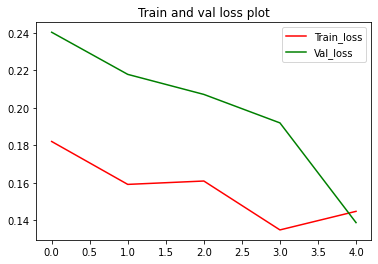

<Figure size 432x288 with 0 Axes>

In [60]:
# Menampilkan grafik untuk training dan validation loss
plt.plot(epoch, loss, 'r', label='Train_loss')
plt.plot(epoch, validation_loss, 'g', label='Val_loss')
plt.title('Train and val loss plot')
plt.legend(loc=0)
plt.figure()

plt.show()

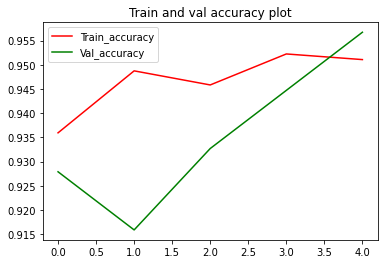

<Figure size 432x288 with 0 Axes>

In [61]:
# Menampilkan grafik untuk training dan validation accuracy
plt.plot(epoch, accuracy, 'r', label='Train_accuracy')
plt.plot(epoch, validation_accuracy, 'g', label='Val_accuracy')
plt.title('Train and val accuracy plot')
plt.legend(loc=0)
plt.figure()

plt.show()

In [63]:
#Konversi model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp3lvrcwun/assets


In [66]:
#save modelnya
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)
  model.save('my_model.pb') 

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets
